Diffusion is a process where a substance moves from a region of higher concentration to a region of lower concentration. We consider a tracer, $\phi$, and solve the equation:
$$ \frac{\partial \phi}{\partial t} = \kappa \frac{\partial^2 \phi}{\partial x^2}, $$
where $\kappa > 0$ and $\phi(x,t)$ is the tracer concentration.

For this equation, the analytical solution is given by:
$$ \phi(x,t) =  e^{-\lambda^2 \kappa t} A sin( \lambda x), $$

where $\lambda = \frac{2 \pi n x}{L_x}$ and $A$ is the amplitude of the wave.

Since we have to impose periodic boundary conditions, we take the full sine curve, and assume $A = 1$, and $n = 1$. 

We have a module named Euler, which contains equations for 1D and 2D advection and diffusion for different types of differencing schemes. Here, we apply the central difference method to the 1D diffusion equation. 

In [1]:
import Euler.Periodic_1D as elr

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from IPython.display import Video

In [3]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

# Test 1: Solving 1D diffusion

In [4]:
#Length of domain
Lx = 100

#Number of points in the domain
nx = 40

#Width of each cell
dx = Lx/nx

g = 9.81
rho0 = 1025

#An array of all points
x = np.linspace(0,Lx,nx+1,dtype = float)
x = x[0:-1]

In [5]:
lmda = (2*np.pi)/Lx
phi_old = (np.sin(lmda*x))
phi_old_t0 = (np.sin(lmda*x))

phi_new = np.zeros(nx)

t_start = 0
t_end = 80
dt = 1

#Set switch - (i) FD = 1, (ii) BD = -1, (iii) CD = 0
#By default, switch is set to 0.
switch_diff_scheme = 0

#actual_sol = 2*(np.sin(2*np.pi*xu_ocean/(Lx)))
kappa = 2.0

# Needed to create animations
phi_data = np.zeros((nx,int(t_end/dt) + 1))
phi_true_data = np.zeros((nx,int(t_end/dt) + 1))

for t in np.arange(t_start,t_end,dt):
    phi_new = phi_old + dt*elr.diff_x(kappa,phi_old,dx,nx)
    phi_actual = np.exp(-lmda**2 * t * kappa) * np.sin(lmda*x)
    phi_old = phi_new
    
    phi_data[:,int(t/dt)] = phi_old
    phi_true_data[:,int(t/dt)] = phi_actual

In [6]:
from matplotlib import animation

fig,ax = plt.subplots(figsize = (13,5)) 

def update_fig(i):
    
    plt.clf()
    plt.title('Time = ' + str(dt*i))
    p1 = plt.plot(x, phi_true_data[:,i], label = 'Actual solution at time ' + str(t) + ' s(Theoretical)')
    p1 = plt.plot(x, phi_data[:,i], label = 'Diffused solution at time ' + str(t) + ' s(Theoretical)', ls = '-.')
    plt.ylim([-1.2, 1.2])
    plt.legend()
    return p1

num_frames = 80
anim = animation.FuncAnimation(fig, update_fig, frames = num_frames, blit = True)
anim.save('1D_Diffusion.mp4',writer = 'ffmpeg',fps = 8)

plt.close(anim._fig)

In [7]:
Video("1D_Diffusion.mp4")

Text(0.5, 1.0, '1D diffusion using central difference')

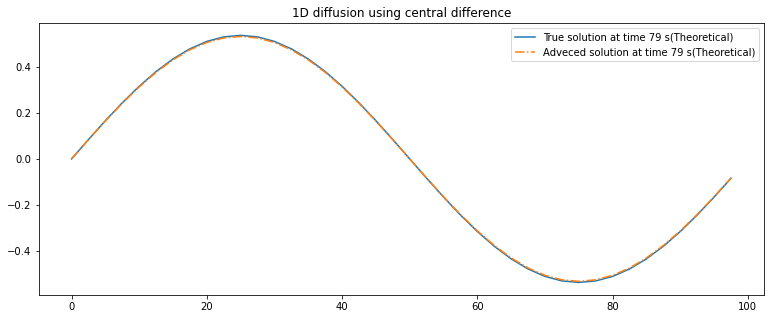

In [8]:
plt.figure(figsize = (13,5))
plt.plot(x, phi_actual, label = 'True solution at time ' + str(t) + ' s(Theoretical)')
plt.plot(x, phi_old, label = 'Adveced solution at time ' + str(t) + ' s(Theoretical)', ls = '-.')
plt.legend()
plt.title('1D diffusion using central difference')

The analytical solution is given by:
$$ \phi(x,t) =  e^{-\lambda^2 \kappa t} sin(\lambda x). $$ 
Here, $\lambda = \frac{2 \pi x}{L_x} = 0.062, \kappa = 2$. Since the sine part of the solution doesn't involve time, we just deal with the exponential part, and in this case, diffusion alters the amplitude of this sine curve without affecting its shape. The amplitude at t = 80 seconds is given by:

$$ e^{-0.0628^2 \times 2 \times 80} = 0.532 $$. 

So, $0.532$ should be the amplitude of our sine wave. This is what we obtain from our numerical solution too. 

# Test 2: Using ghost points

This time, instead of periodic boundary conditions, we use ghost points. The equations we have to solve is given by:

\begin{equation}
    \frac{\partial \phi}{\partial t} = \kappa \frac{\partial^2 \phi}{\partial t^2}
\end{equation}

For the interior points, our solution scheme stays constant. For the boundary points, i.e., for $\phi(x = 0) = \phi_0$ and $\phi(x = x_m) = \phi_m$, we use ghost points for evaluation. These points do not exist in the physical domain, but we use them to keep the numerical scheme to be of the same order as the interior points. 

For $\phi_0$, discretising the governing equation using forward in time central in space scheme, we get:
\begin{equation}
    \frac{\phi_0^{n+1} - \phi_0^n}{\Delta t} = \kappa \frac{\phi_{1}^n - 2\phi_{0}^n + \phi_{-1}^n}{\Delta x^2},
\end{equation}

where $\phi_{-1}$ is the value of the variable at a ghost point to the left of $x_0$. Similarly, for $x = x_m$, upon discretising in the same way, we get:

\begin{equation}
    \frac{\phi_m^{n+1} - \phi_m^n}{\Delta t} = \kappa \frac{\phi_{m+1}^n - 2\phi_{m}^n + \phi_{m-1}^n}{\Delta x^2}, \end{equation}


If we have the Neumann boundary condition as:

\begin{equation}
    \frac{\partial \phi}{\partial t}  = \Phi_{l} \text{     for     } x = 0, 
\end{equation}

\begin{equation}
    \frac{\partial \phi}{\partial t}  = \Phi_{r} \text{     for     } x = x_m.
\end{equation}

Discretising the boundary conditions above, we obtain:

\begin{equation}
    \frac{\phi_1^{n} - \phi_{-1}^{n}}{2 \Delta x}  = \Phi_{l} \text{     for     } x = 0,
\end{equation}

\begin{equation}
    \frac{\phi_{m+1}^{n} - \phi_{m-1}^{n}}{2 \Delta x}  = \Phi_{r} \text{     for     } x = x_m.
\end{equation}

Using Eq (6) to obtain $\phi_{-1}^n$ and substituting in Eq (2), we get an equation for $\phi_0^{n+1}$:

\begin{equation}
    \phi_0^{n+1} = \phi_0^n + \frac{2 \kappa \Delta t}{\Delta x^2} \Big(\phi_1^n - \phi_0^n - \Phi_l \Delta x \Big)
\end{equation}

Similarly, using Eq (7) to get $\phi^n_{m+1}$ and substituting in Eq (3), we get an equation for $\phi_n^{n+1}$:

\begin{equation}
    \phi_m^{n+1} = \phi_m^n + \frac{2 \kappa \Delta t}{\Delta x^2} \Big(\phi_{m-1}^n - \phi_0^n + \Phi_r \Delta x \Big)
\end{equation}

In [9]:
#Length of domain
Lx = 100

#Number of points in the domain
nx = 40

#Width of each cell
dx = Lx/nx

g = 9.81
rho0 = 1025

#An array of all points
xu_ocean = np.linspace(0,Lx,nx,dtype = float)
#xu_ocean = xu_ocean[0:-1]

In [10]:
def partial_x2_cd(f,dx,nx):
    
    """This function computes the second order central derivative of x
    
    -------------------------------------------------------------------------------------
    Arguments:
    f: Function which needs to be differentiated
    dx: Width of each cell
    nx: Number of points in the domain
    -------------------------------------------------------------------------------------
    Returns:
    dfdx: Second derivative of f(x)
    """

    dfdx = np.zeros_like(f)
    dfdx[1:nx-1] = 1/(dx**2) * (f[2:nx] - 2*f[1:nx-1] + f[0:nx-2])
    
    return dfdx

def diff_x(kappa,tracer,dx,nx,ID_diff_type = 0):
    if (ID_diff_type == 0): 
        f3 = kappa*partial_x2_cd(tracer,dx,nx)
        return f3
    else:
        print('Please provide right value for ID_diff_type')

In [11]:
lmda = (2*np.pi)/Lx
phi_old = (np.sin(lmda*x - np.pi/2))
phi_old_t0 = (np.sin(lmda*x - np.pi/2))

phi_new = np.zeros(nx)

t_start = 0
t_end = 80.01
dt = 1

#Set switch - (i) FD = 1, (ii) BD = -1, (iii) CD = 0
#By default, switch is set to 0.
switch_diff_scheme = 0

#Boundary condition for phi
phi_beg = 0
phi_end = 0

#actual_sol = 2*(np.sin(2*np.pi*xu_ocean/(Lx)))
kappa = 2.0

#True solution
phi_true = (np.sin(lmda*x - np.pi/2))

# Needed to create animations
phi_data = np.zeros((nx,int(t_end/dt) + 1))
phi_true_data = np.zeros((nx,int(t_end/dt) + 1))

for t in np.arange(t_start,t_end,dt):
    
    #Calculating interior points
    phi_new[1:nx-1] = phi_old[1:nx-1] + dt*diff_x(kappa,phi_old,dx,nx)[1:nx-1]
    
    #Calculating boundary points (Using ghost points)
    phi_new[0] = phi_old[0] + ((kappa*dt)/dx**2)*(2*phi_old[1] - 2*phi_old[0] - 2*phi_beg*dx)
    phi_new[-1] = phi_old[-1] + ((kappa*dt)/dx**2)*(2*phi_old[-2] - 2*phi_old[-1] + 2*phi_end*dx)

    phi_true = np.exp(-lmda**2 * t * kappa) * np.sin(lmda*x - np.pi/2)
    phi_data[:,int(t/dt)] = phi_old
    phi_true_data[:,int(t/dt)] = phi_true
    
    phi_old = phi_new

In [12]:
from matplotlib import animation

fig,ax = plt.subplots(figsize = (13,5)) 

def update_fig(i):
    
    plt.clf()
    plt.title('Time = ' + str(i))
    p1 = plt.plot(x, phi_true_data[:,i], label = 'Actual solution at time ' + str(t) + ' s(Theoretical)')
    p1 = plt.plot(x, phi_data[:,i], label = 'Numerical solution at time ' + str(t) + ' s(Theoretical)')
    plt.ylim([-1.2, 1.2])
    plt.legend()
    return p1

num_frames = 80
anim = animation.FuncAnimation(fig, update_fig, frames = num_frames, blit = True)
anim.save('1D_Diffusion_GP.mp4',writer = 'ffmpeg',fps = 8)

plt.close(anim._fig)

In [13]:
Video("1D_Diffusion_GP.mp4")

Text(0.5, 1.0, '1D advection using forward difference and positive advection velocity')

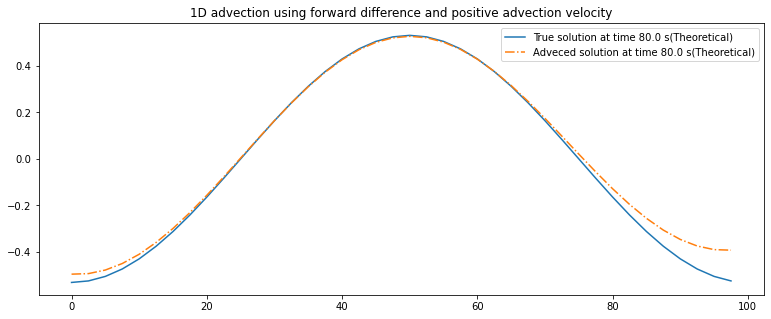

In [14]:
plt.figure(figsize = (13,5))
plt.plot(x, phi_true, label = 'True solution at time ' + str(t) + ' s(Theoretical)')
plt.plot(x, phi_old, label = 'Adveced solution at time ' + str(t) + ' s(Theoretical)', ls = '-.')
plt.legend()
plt.title('1D advection using forward difference and positive advection velocity')

1D diffusion works well with the central difference scheme. The Von-Neumann stability analysis says that as long as the Courant number is less than 1, all schemes are stable for diffusion. We move on to the error analysis to confirm whether the error reduces as we expect it to.

# Test 3: Error analysis

We have applied the 2nd order central difference scheme, and so, our error must reduce quadratically as dx decreases, if the code is computing the diffusion correctly.

In [15]:
Lx = 1000
nx = np.array([8,16,32,64,128,256,512,1024,2048])
g = 9.81
rho0 = 1025
kappa = 0.5
error_diff = np.zeros(len(nx))

for i,nxi in enumerate(nx):
    dx = Lx/nxi
    lmda = (2*np.pi)/Lx
    x = np.linspace(0,Lx,nxi+1,dtype = float)
    x = x[0:-1]
    phi_old = (np.sin(lmda*x))
    phi_new = np.zeros(nxi)
    
    t_start = 0
    t_end = 40
    dt = 0.01
    
    actual_sol = np.exp(-lmda**2 * t_end * kappa) * np.sin(lmda*x)

    for t in np.arange(t_start,t_end,dt):
        phi_new = phi_old + dt*elr.diff_x(kappa,phi_old,dx,nxi)

        phi_old = phi_new
        
    error_iter = max(abs(actual_sol - phi_new))
    error_diff[i] = error_iter

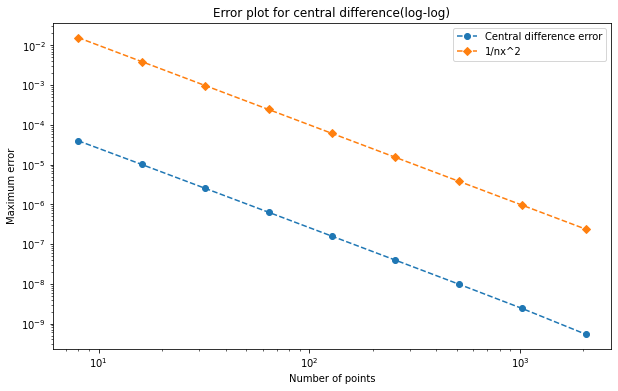

In [16]:
plt.figure(figsize = (10,6))
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of points")
plt.ylabel("Maximum error")
plt.plot(nx,error_diff,marker='o',linestyle = '--',label = 'Central difference error')
plt.plot(nx, 1/nx**2, marker = 'D',linestyle = '--', label = '1/nx^2')
plt.title("Error plot for central difference(log-log)")
plt.legend()
plt.show()

As shown in the error plot above, the error does scale down as $\frac{1}{nx^2}$, where $nx$ is the number of points in the domain.